In [1]:
import numpy as np

In [2]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [3]:
len(fish_length)

49

In [4]:
np.column_stack(([1,2,3], ['a','b','c']))

array([['1', 'a'],
       ['2', 'b'],
       ['3', 'c']], dtype='<U21')

In [5]:
fish_data = np.column_stack((fish_length, fish_weight))

In [6]:
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [7]:
np.ones(5)

array([1., 1., 1., 1., 1.])

In [8]:
np.zeros(5)

array([0., 0., 0., 0., 0.])

In [11]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [12]:
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [13]:
# 사이킷런으로 훈련 세트와 테스트 세트 나누기
from sklearn.model_selection import train_test_split

In [15]:
train_input, test_input, train_target, test_target = train_test_split(
  fish_data, fish_target, 
  random_state=42
  )

In [16]:
print(train_input.shape, test_input.shape)

(36, 2) (13, 2)


In [17]:
13/49

0.2653061224489796

In [18]:
print(train_target.shape, test_target.shape)

(36,) (13,)


In [19]:
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, stratify=fish_target, random_state=42)

In [20]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [21]:
print(kn.predict([[25, 150]]))

[0.]


In [22]:
import matplotlib.pyplot as plt

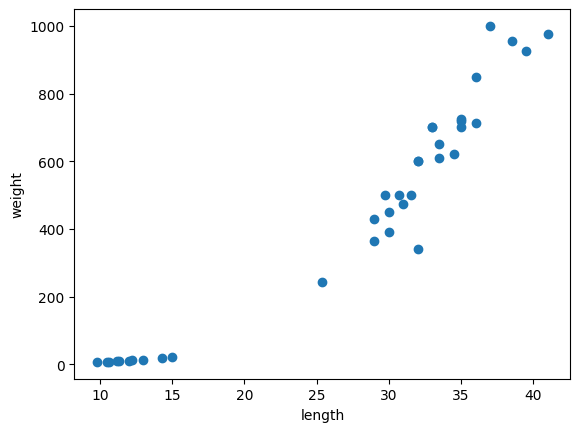

In [24]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

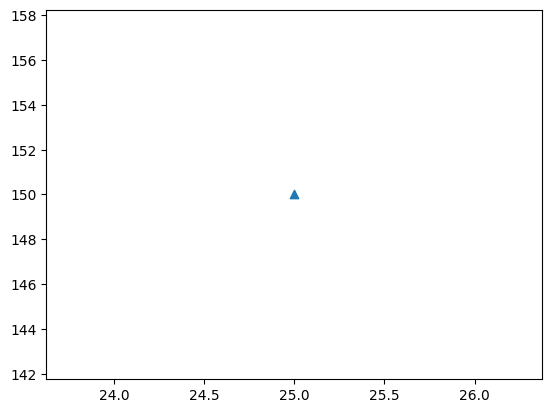

In [25]:
plt.scatter(25, 150, marker='^')

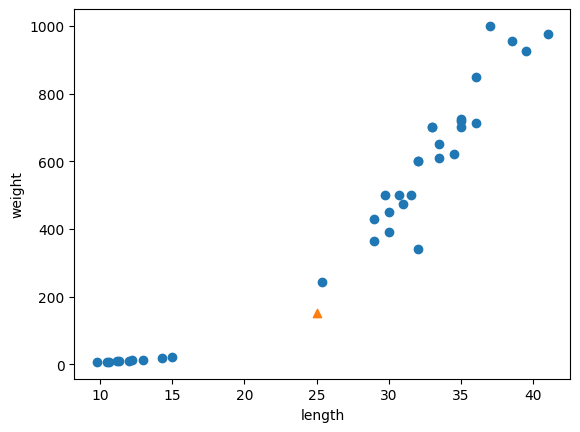

In [27]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [28]:
distances, indexes = kn.kneighbors([[25, 150]])

In [29]:
distances

array([[ 92.00086956, 130.48375378, 130.73859415, 138.32150953,
        138.39320793]])

In [30]:
indexes

array([[21, 33, 19, 30,  1]])

In [31]:
train_input[indexes,0]

array([[25.4, 15. , 14.3, 13. , 12.2]])

In [32]:
train_input[indexes,1]

array([[242. ,  19.9,  19.7,  12.2,  12.2]])

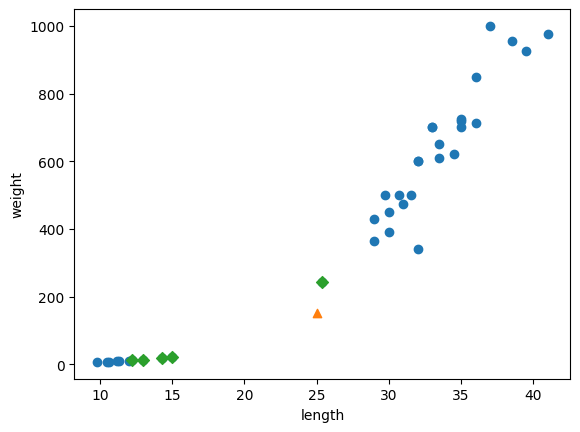

In [41]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [34]:
print(train_input[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


In [35]:
print(train_target[indexes])

[[1. 0. 0. 0. 0.]]


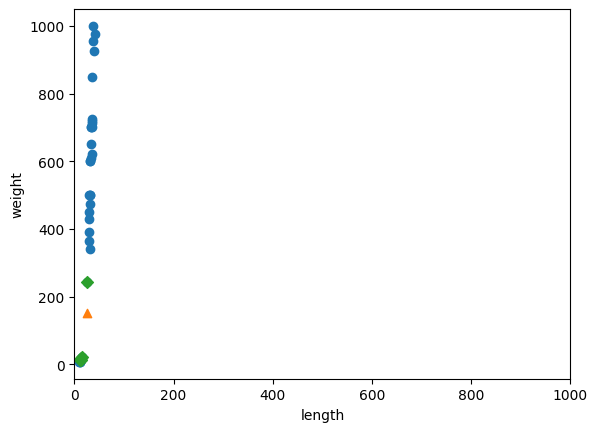

In [39]:
# 기준을 맞춰라
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.xlim((0, 1000))
plt.show()

In [42]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

In [43]:
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [44]:
train_scaled = (train_input - mean) / std

In [46]:
print(train_scaled[:5])

[[ 0.24070039  0.14198246]
 [-1.51237757 -1.36683783]
 [ 0.5712808   0.76060496]
 [-1.60253587 -1.37766373]
 [ 1.22242404  1.45655528]]


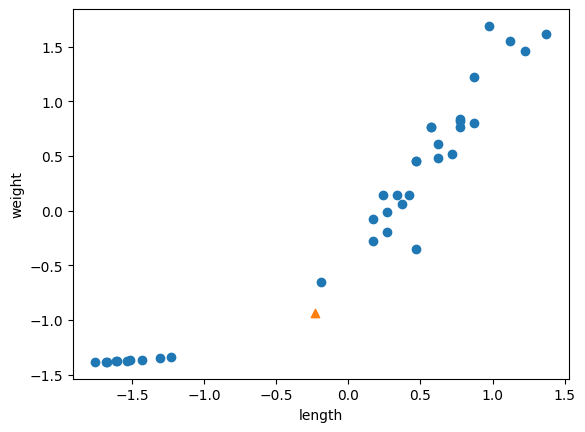

In [48]:
new = ([25, 150] - mean) / std

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [49]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [50]:
print(kn.predict([new]))

[1.]


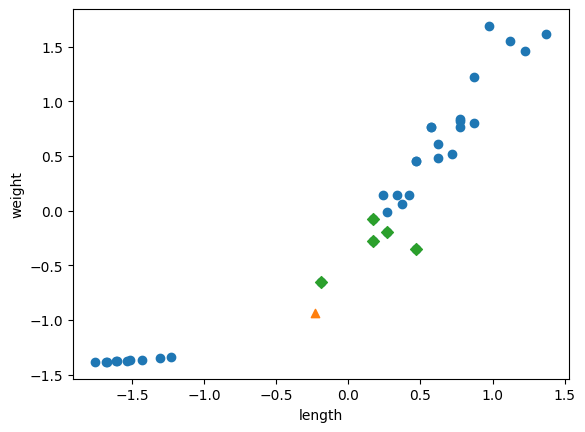

In [51]:
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()